## Run this before anything starts

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import cv2 as cv
from PIL import Image
import pickle
import random

## Load FMC data from .mat file

In [29]:
mat = scipy.io.loadmat('timeTraces.mat')
fmc = mat['timeTraces']
print(list(fmc.shape))
print(type(fmc))

[4472, 16, 16]
<class 'numpy.ndarray'>


## Read Images

By reading the images in greyscale, it compresses the images to 2 dimensions, instead of 3 dimensions.

The shape of the images will be (X, Y) instead of (X, Y, Z).

Colormap of the image:

https://matplotlib.org/stable/tutorials/colors/colormaps.html


The shape of the GREYSCALE image is (180, 240)


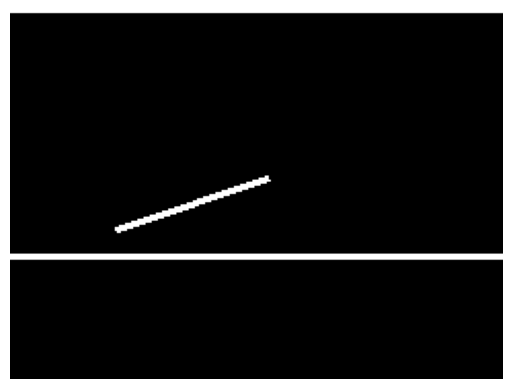

The shape of the image is (180, 240, 3)


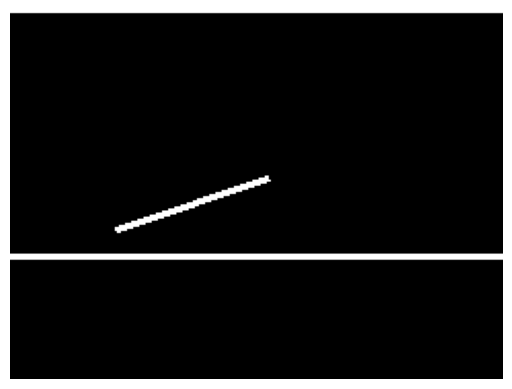

In [4]:
# Read Images in greyscale
import cv2 as cv


dirName = "/Users/chenkangan/PycharmProjects/ME4_FYP_py/py_output_fig"
imageName = 'defect_1_yshift_60.png'


def read_image(dirName, imageName, grey = True):
    
    if grey == True:
        image = cv.imread(f'{dirName}/{imageName}', cv.IMREAD_GRAYSCALE)
        print(f'The shape of the GREYSCALE image is {image.shape}')
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()
              
    else:
        image = cv.imread(f'{dirName}/{imageName}')
        print(f'The shape of the image is {image.shape}')
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()
          
    return None

read_image(dirName, imageName, grey = True)
read_image(dirName, imageName, grey = False)

The shape of the NORMAL image is (180, 240, 3)


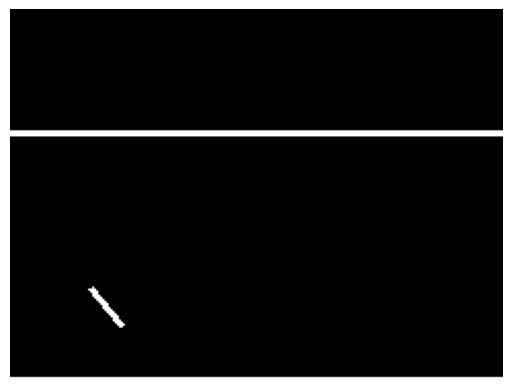

In [20]:
# Read Images in normal color
from matplotlib import image as mpimg
image = mpimg.imread('my.png')
dirName_py = "/Users/chenkangan/PycharmProjects/ME4_FYP_py/py_output_fig/defect_-999_yshift_0.png"
image = mpimg.imread(dirName_py)

plt.imshow(image)
plt.axis('off')

print(f'The shape of the NORMAL image is {image.shape}')

## Read FMC data as an image

### Modes of reading an image

PIL.Image.fromarray(obj, mode=None)

https://pillow.readthedocs.io/en/stable/reference/Image.html

https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

- 1 (1-bit pixels, black and white, stored with one pixel per byte)
- L (8-bit pixels, black and white)
- P (8-bit pixels, mapped to any other mode using a color palette)
- RGB (3x8-bit pixels, true color)
- RGBA (4x8-bit pixels, true color with transparency mask)
- CMYK (4x8-bit pixels, color separation)
- YCbCr (3x8-bit pixels, color video format)
- Note that this refers to the JPEG, and not the ITU-R BT.2020, standard
- LAB (3x8-bit pixels, the L*a*b color space)
- HSV (3x8-bit pixels, Hue, Saturation, Value color space)
- Hue’s range of 0-255 is a scaled version of 0 degrees <= Hue < 360 degrees
- I (32-bit signed integer pixels)
- F (32-bit floating point pixels)

In [43]:
# Method 1 to show an image
from PIL import Image
# L iss black and white
img = Image.fromarray(fmc[:,:,1],'L')
print(f'The shape of the FMC slice is {fmc[:,:,1].shape}')
img.save('fmc_image_PIL.png')
# img.show()

# greyscale = true 
# This is preferred because we do not want color channel information affect the CNN
read_image(dirName = "/Users/chenkangan/PycharmProjects/ME4_FYP_py", 
           imageName = "fmc_image_PIL.png" , 
           grey = True)

# greyscale = false
# read_image(dirName = "/Users/chenkangan/PycharmProjects/ME4_FYP_py", 
#            imageName = "fmc_image_PIL.png" , 
#            grey = False)

The shape of the FMC slice is (4472, 16)
The shape of the GREYSCALE image is (4472, 16)


The shape of the FMC slice is (4472, 16)
The shape of the GREYSCALE image is (480, 640)


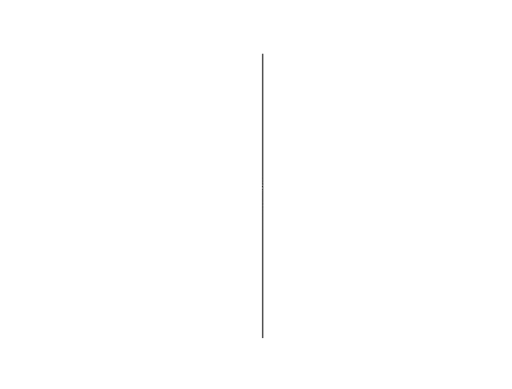

In [44]:
# Method 2 to show an image (This method is not good as the shape will change)
plt.imshow(fmc[:,:,1], interpolation='nearest')
print(f'The shape of the FMC slice is {fmc[:,:,1].shape}')
plt.axis('off')
plt.savefig('fmc_image_plt.png')

# greyscale = true 
# This is preferred because we do not want color channel information affect the CNN
read_image(dirName = "/Users/chenkangan/PycharmProjects/ME4_FYP_py", 
           imageName = "fmc_image_plt.png" , 
           grey = True)

## Create training data (OUTDATED, check create_training_data.py)

VERY VERY USEFUL VIDEO TUTORIAL!!!\
https://www.youtube.com/watch?v=j-3vuBynnOE

In [38]:
def read_gray_image(dirName, imageName, plotting = False):
    
    image = cv.imread(f'{dirName}/{imageName}', cv.IMREAD_GRAYSCALE)
    print(f'The shape of the GREYSCALE image is {image.shape}')
    if plotting == True:
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()
    return image

# read image test
index = 1
dirName_pic = '/Users/chenkangan/PycharmProjects/ME4_FYP_py/py_output_fig'
imgName = f'defect_{index}_yshift_60.png'
image = read_gray_image(dirName_pic, imgName, plotting = False)

In [12]:
def create_training_data(subsample = True):
    training_data = []
    dirName_fmc = '/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/FMC_variable'
    dirName_pic = '/Users/chenkangan/PycharmProjects/ME4_FYP_py/py_output_fig'
    
    for index in range(1,2001):
        filename = f'fmc_{index}.mat'
        imgName = f'defect_{index}_yshift_60.png'
        
        mat = scipy.io.loadmat(f'{dirName_fmc}/{filename}')
        fmc = mat['timeTraces']
        
        if subsample == True:
            fmc = fmc[0::5]
        else:
            pass
        
        image = read_gray_image(dirName_pic, imgName, plotting = False)
        # I need to append ([fmc, label])
        training_data.append([fmc, image, index])
        
    pickle_out = open("training_data_subsampled.pickle","wb")
    pickle.dump(training_data, pickle_out)
    pickle_out.close()
        
    return training_data
        
# subsample every 5th data
# training_data = create_training_data(subsample = True)

## Store training data in a pickle

https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/

In [57]:
import pickle

pickle_out = open("training_data.pickle","wb")
pickle.dump(training_data, pickle_out)
pickle_out.close()

# x contains training data and y contains the label

# pickle_out = open("x.pickle","wb")
# pickle.dump(x, pickle_out)
# pickle_out.close()

# pickle_out = open("y.pickle","wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()

## Load training data from a pickle and check the result

In [108]:
pickle_in = open("training_data_subsampled.pickle","rb")
train_data = np.array(pickle.load(pickle_in), dtype=object)
print(f'The shape of entire training dataset: {train_data.shape}')
print(f'The shape of a dataset: {train_data[1].shape}')
print(f'The shape of a matrix: {train_data[1][0].shape}')
print(f'The shape of an image: {train_data[1][1].shape}')
print(f'The type of an index: {type(train_data[1][2])}')

The shape of entire training dataset: (2000, 3)
The shape of a dataset: (3,)
The shape of a matrix: (895, 16, 16)
The shape of an image: (180, 240)
The type of an index: <class 'int'>


In [115]:
train_data = train_data[:500]
X = train_data[:, 0].tolist()
y = train_data[:, 1]
y = y / 255
y = y.tolist()
y

[array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 arr

Apply scaler on fmc data:
https://stackoverflow.com/questions/50125844/how-to-standard-scale-a-3d-matrix

Random number is 1493!
The lucky index is 1494!
The random number != index because the 0-index issue that python has.


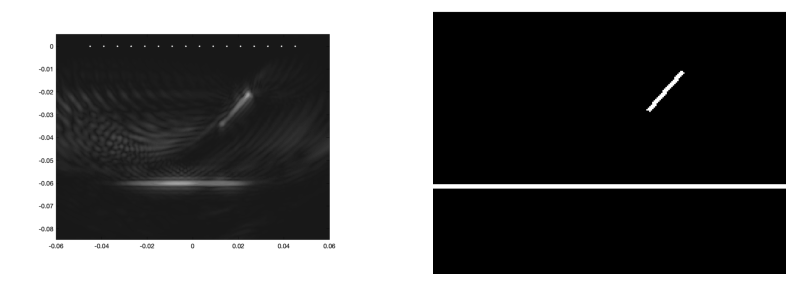

The random column plotted is 8


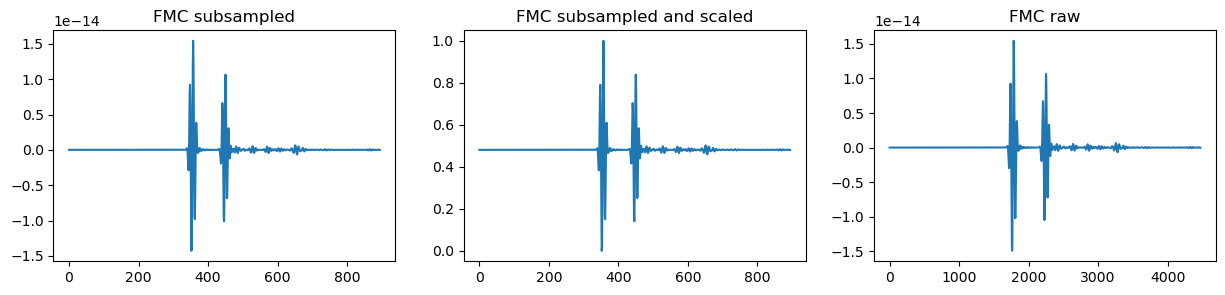

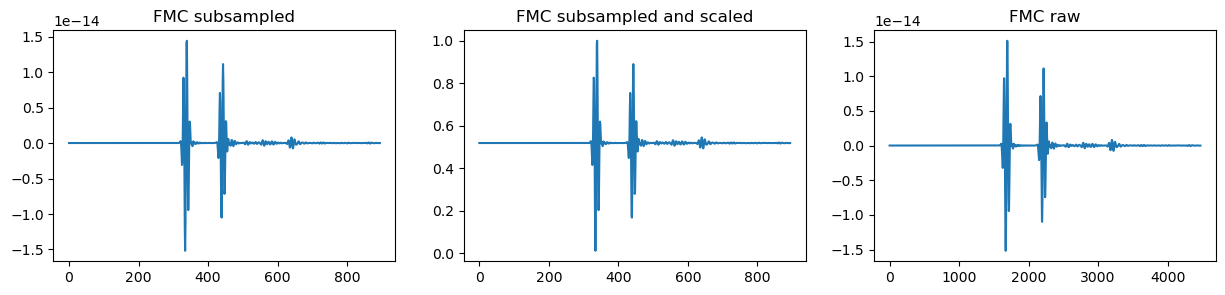

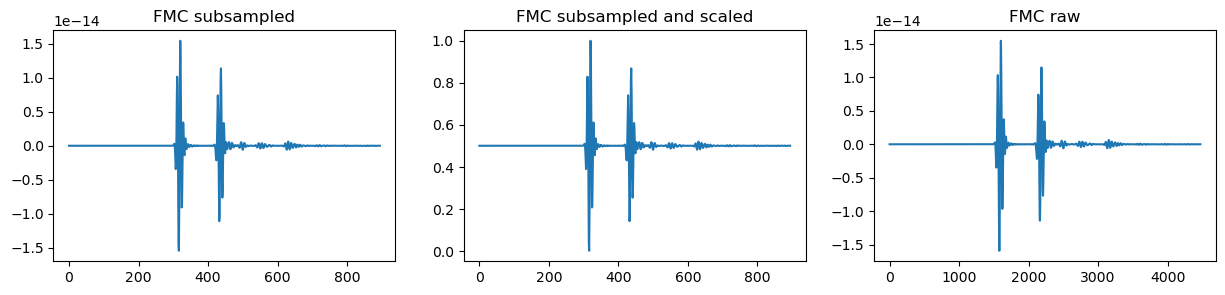

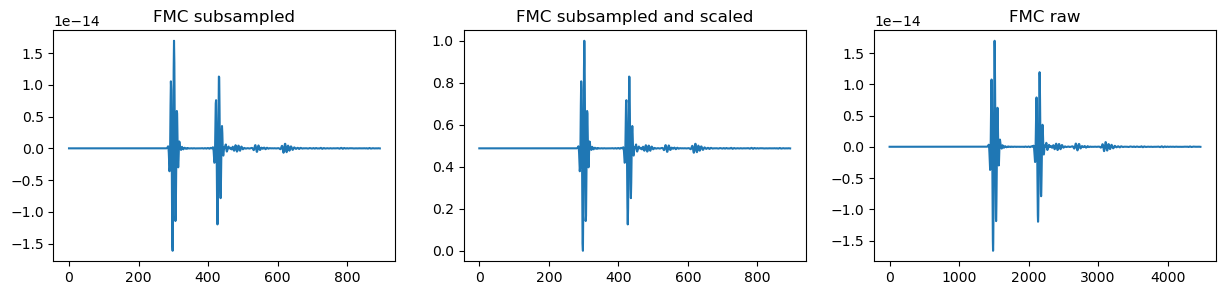

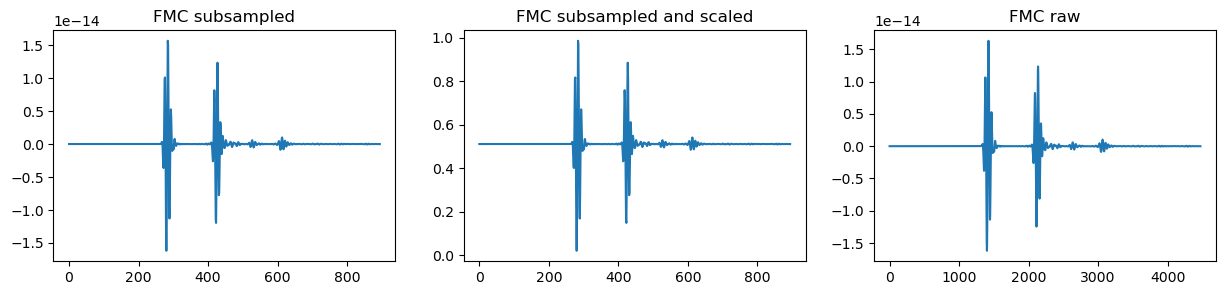

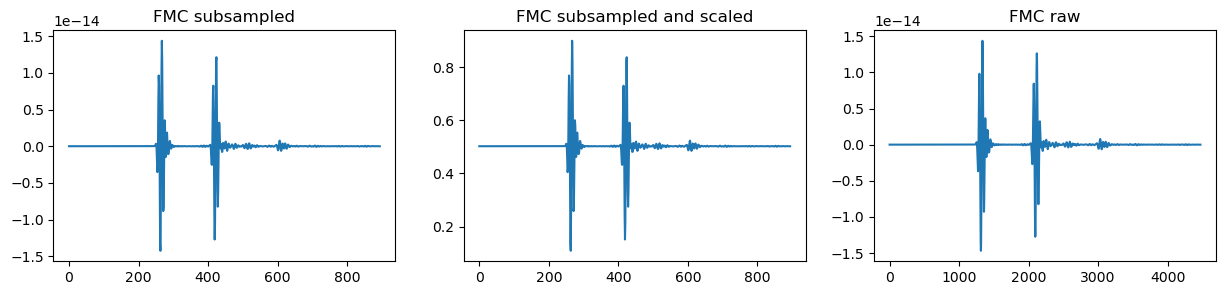

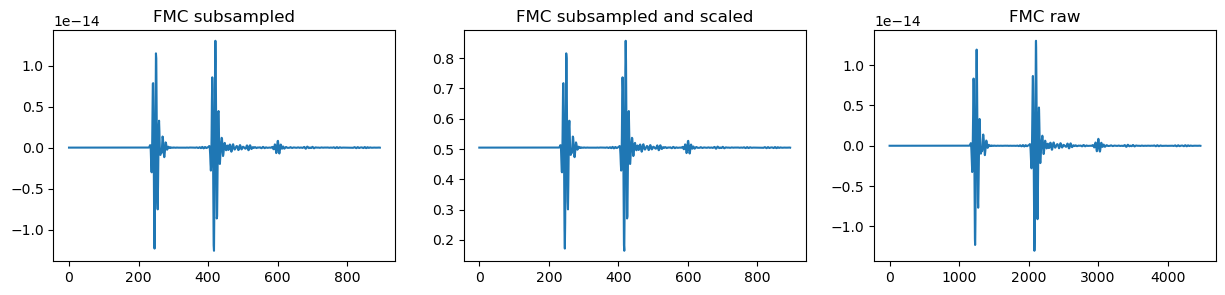

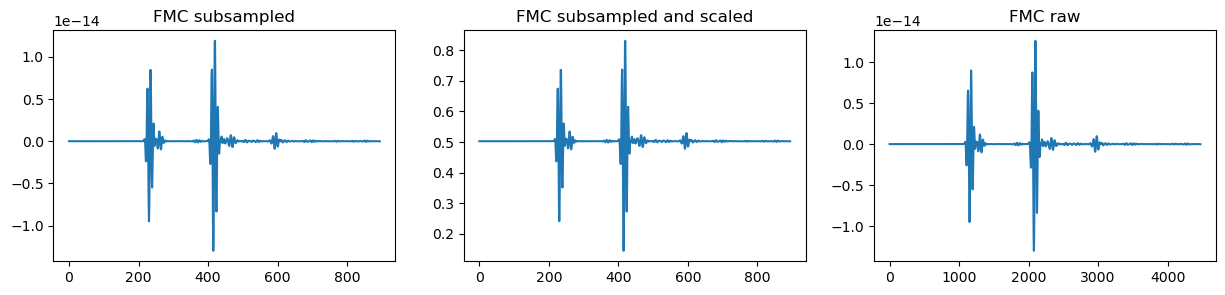

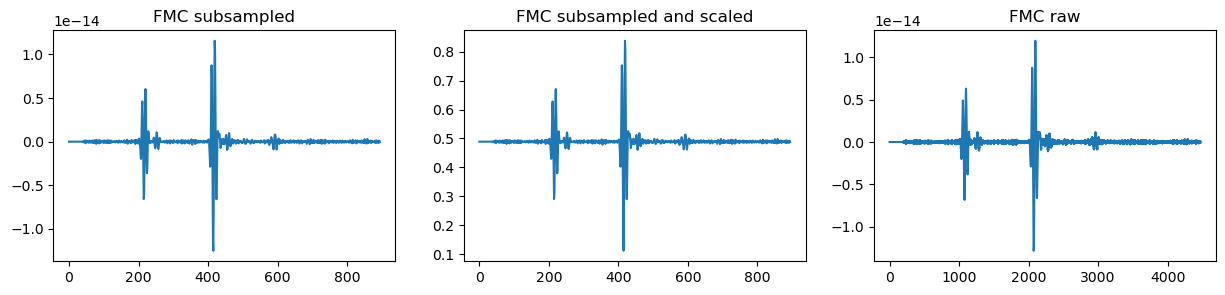

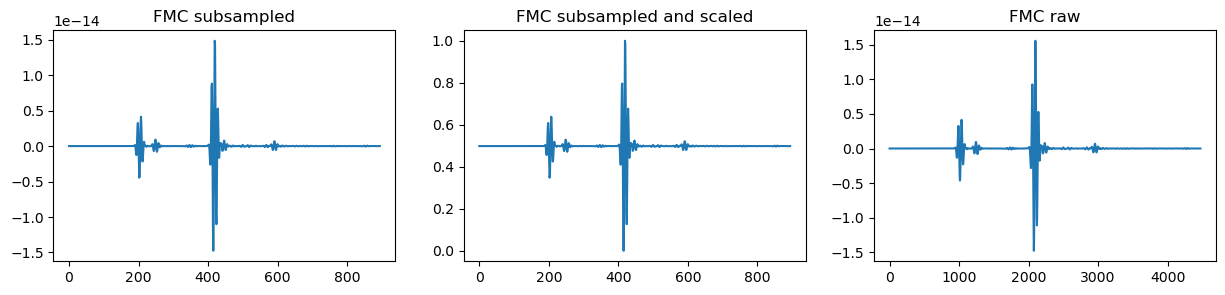

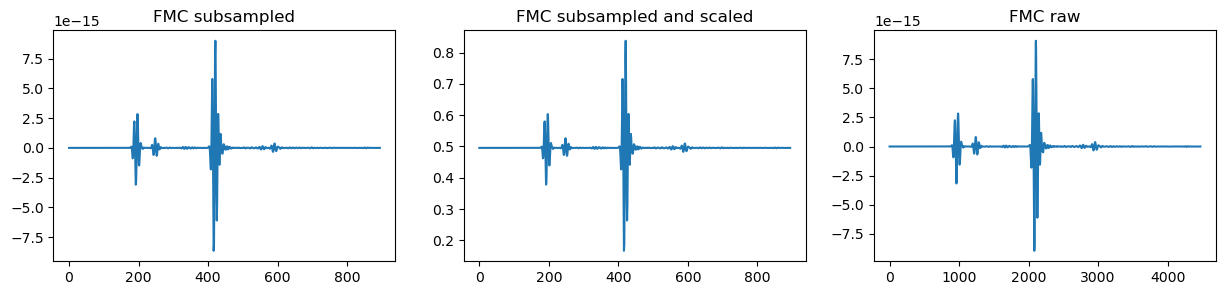

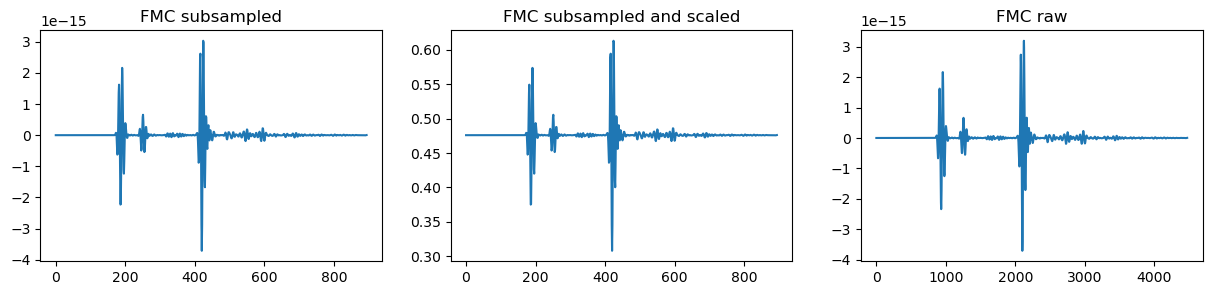

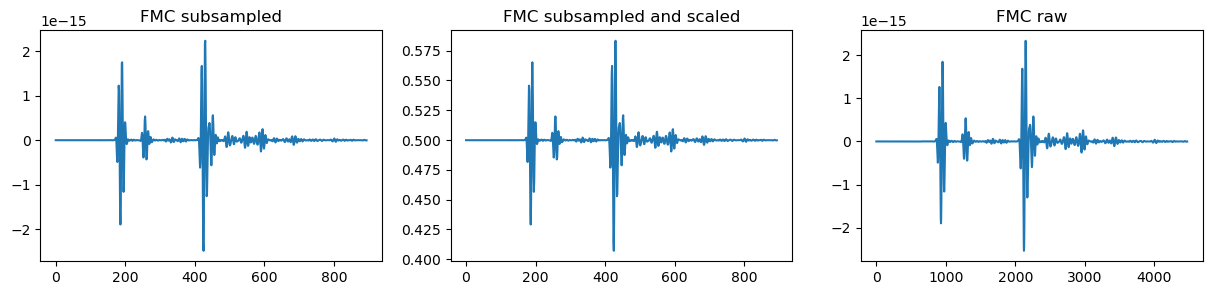

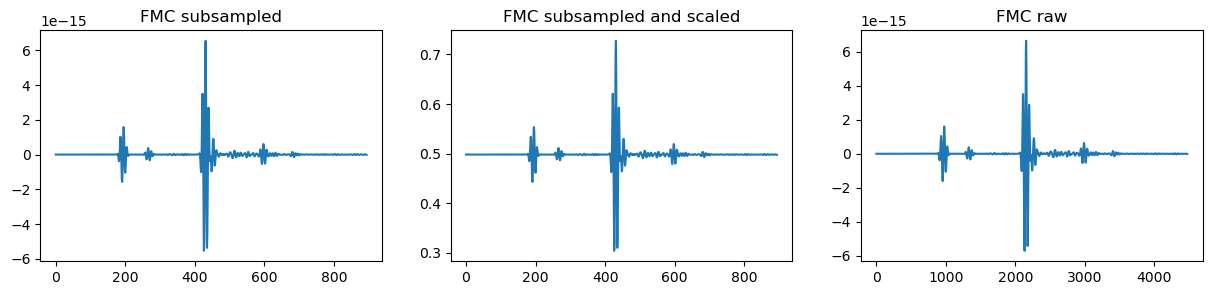

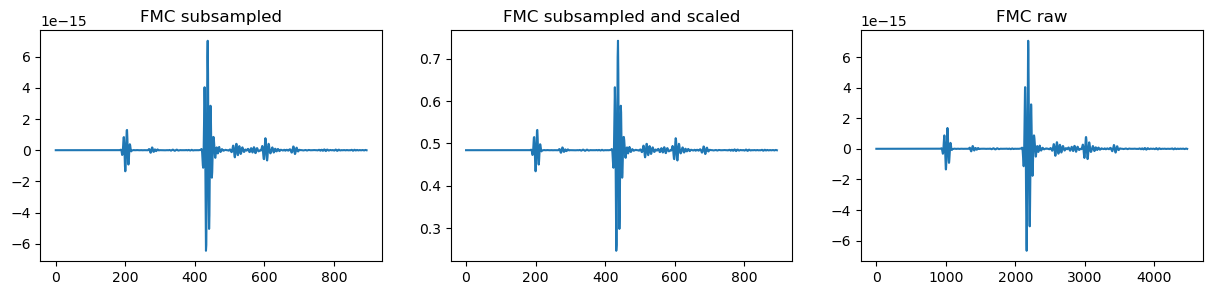

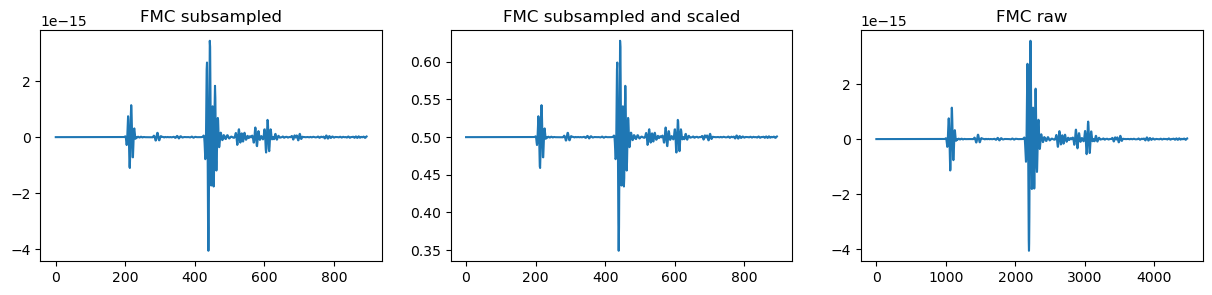

In [104]:
# test whether the data a stored properly

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

rand_num = random.randint(1,2001)
print(f'Random number is {rand_num}!')

dirName_das_fmc = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/DAS_Figure_FMC"
dirName_fmc = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/FMC_variable"

index = train_data[rand_num][2]
print(f'The lucky index is {index}!')
print('The random number != index because the 0-index issue that python has.')

f = plt.figure(figsize=(10,4))

# Read image in greyscale 
image_das_fmc = cv.imread(f'{dirName_das_fmc}/Figure_{index}_fmc.png',cv.IMREAD_GRAYSCALE)  # convert to array

ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.imshow(image_das_fmc, cmap='gray')
ax.axis('off')
ax2.imshow(train_data[rand_num][1], cmap='gray')
ax2.axis('off')
plt.show()

fmc_select = train_data[rand_num][0]
# print(fmc_select.shape[-1])

# !!! Scale function !!!! NEED TO DOUBLE CHECK !!!!! 
fmc_select_scale = scaler.fit_transform(fmc_select.reshape(-1, fmc_select.shape[-1])).reshape(fmc_select.shape)

filename = f'fmc_{index}.mat'
mat = scipy.io.loadmat(f'{dirName_fmc}/{filename}')
# fmc_raw is not subsampled
fmc_raw = mat['timeTraces']

# plot a random column
rand_col = random.randint(0,15)
print(f'The random column plotted is {rand_col}')

for i in range(0,16):    
    f = plt.figure(figsize=(15,3))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    ax.set_title('FMC subsampled')
    ax.plot(fmc_select[:,rand_col,i])
    ax2.set_title('FMC subsampled and scaled')
    ax2.plot(fmc_select_scale[:,rand_col,i])
    ax3.set_title('FMC raw')
    ax3.plot(fmc_raw[:,rand_col,i])
    plt.show()


## Subsampling Investigation
Using numpy slicing for fast computation:\
https://stackoverflow.com/questions/25876640/subsampling-every-nth-entry-in-a-numpy-array


In [15]:
mat = scipy.io.loadmat('timeTraces.mat')
fmc = mat['timeTraces']
print(list(fmc.shape))
print(type(fmc))

[4472, 16, 16]
<class 'numpy.ndarray'>


In [21]:
# Best way to subsample
# numpy's slicing, simply start:stop:step
# Sub-sample every 5 data in fmc
fmc_sample = fmc[0::5]

# Bad way to subsample (need to create use extra memory)
# fmc_sample = []
# for i in range(0,list(fmc.shape)[0],5):
#     fmc_sample.append(fmc[i,:,:])
    
# fmc_sample = np.array(fmc_sample)
print(fmc_sample.shape)

(895, 16, 16)


In [68]:
a = np.arange(0,101,1)
print(a)
print(a[::5])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100]


## Compare ths subsampled fmc and original fmc

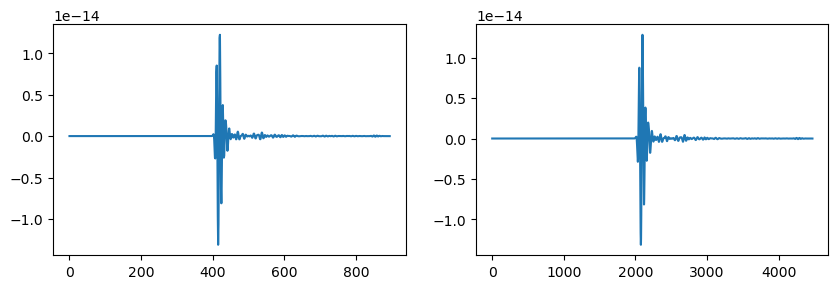

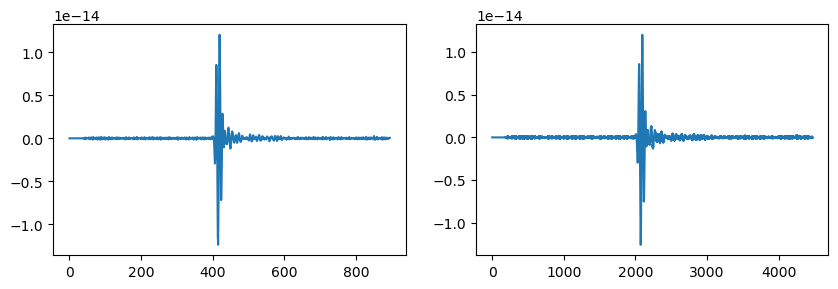

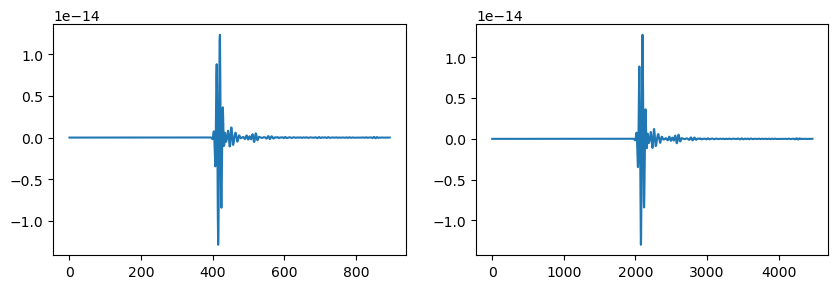

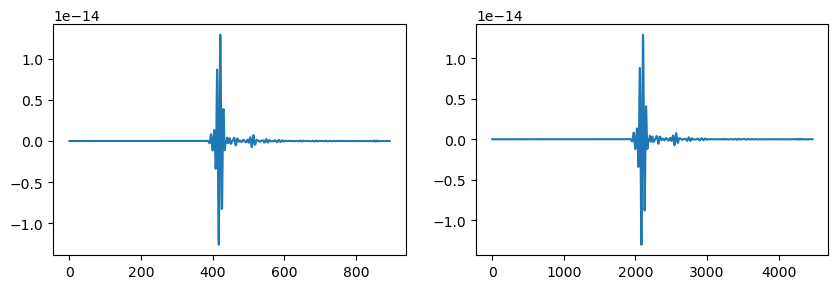

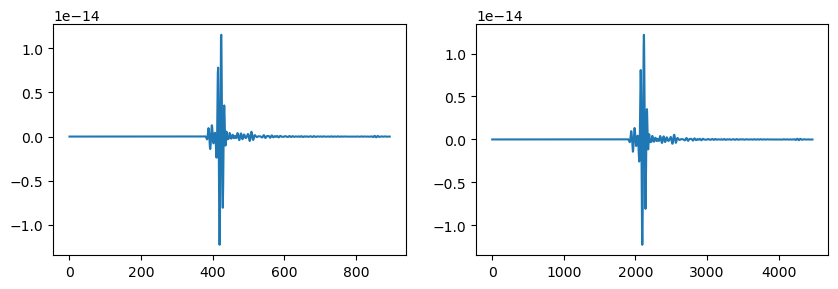

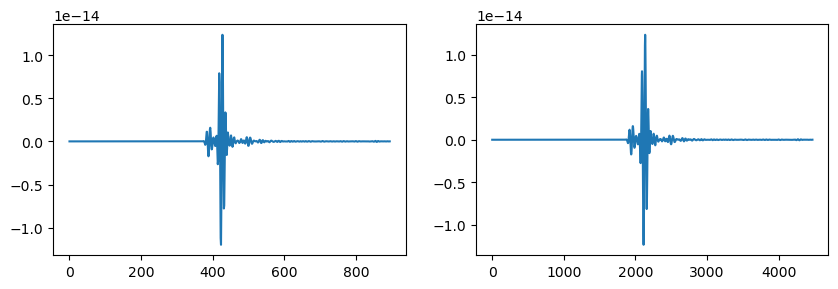

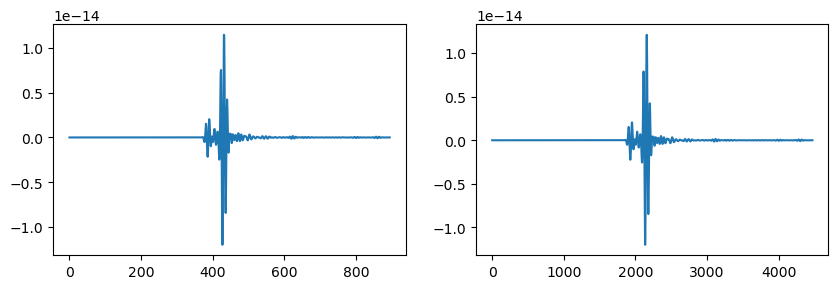

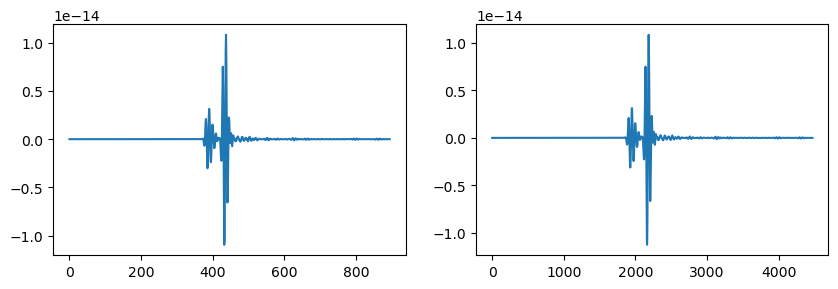

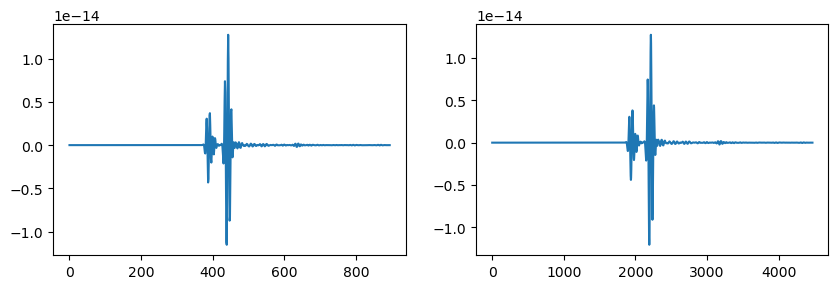

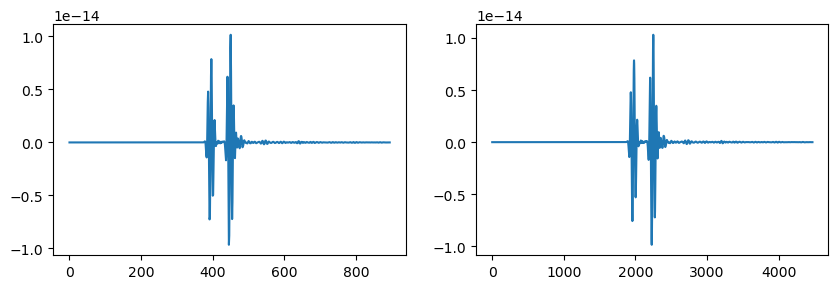

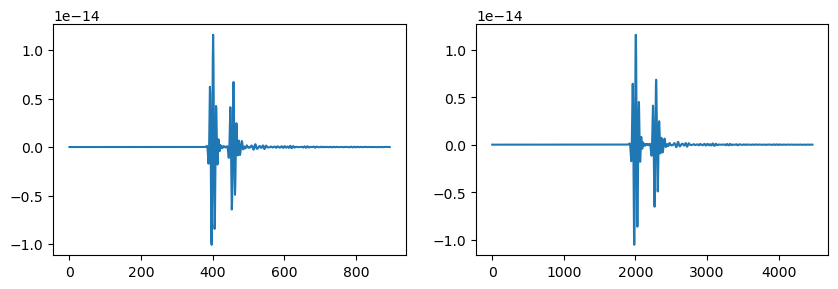

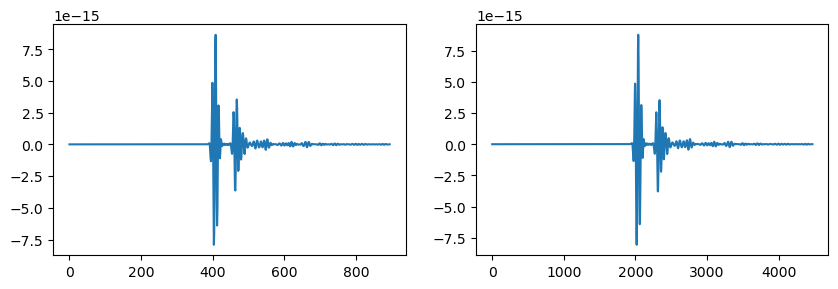

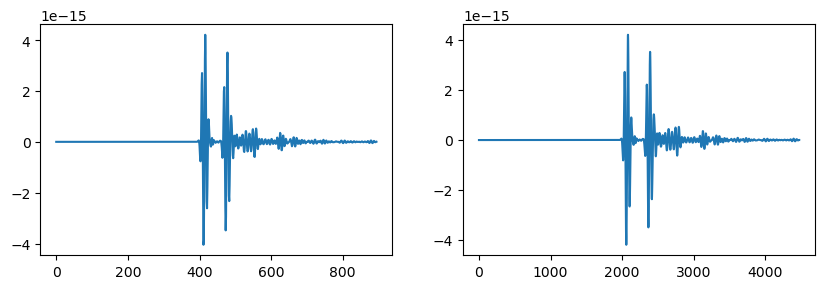

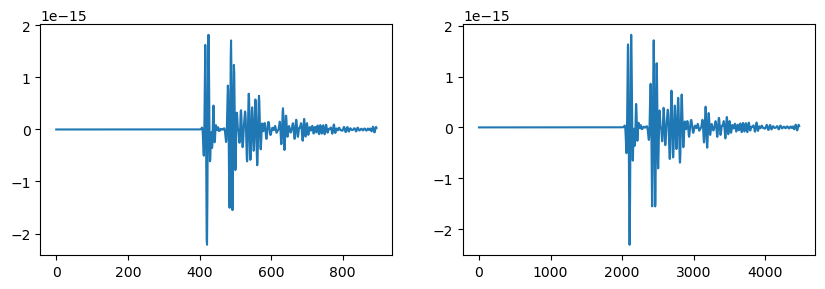

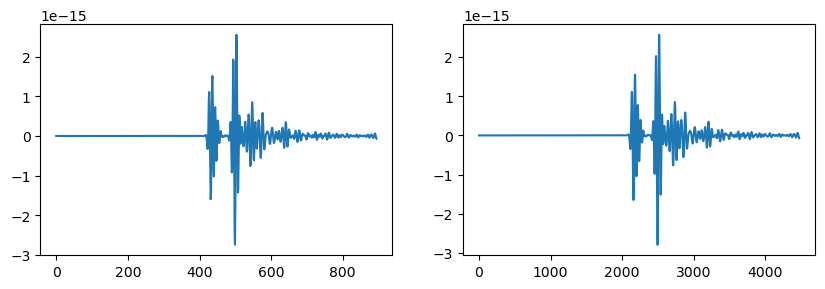

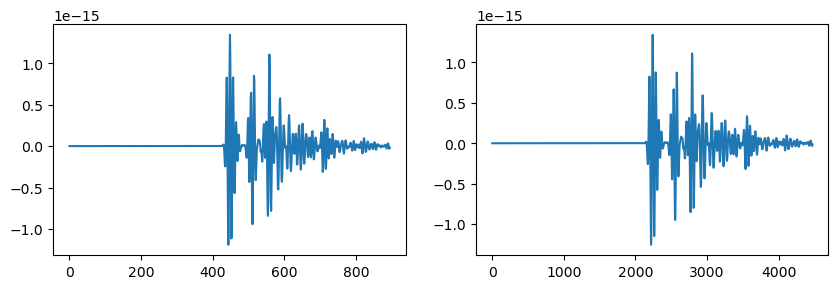

In [22]:
for i in range(0,16):    
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.plot(fmc_sample[:,1,i])
    ax2.plot(fmc[:,1,i])
    plt.show()

## Others

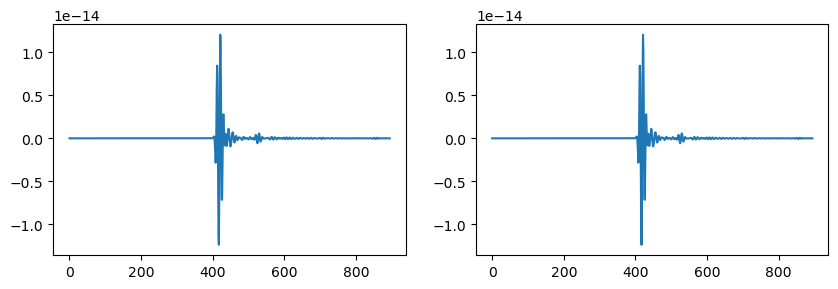

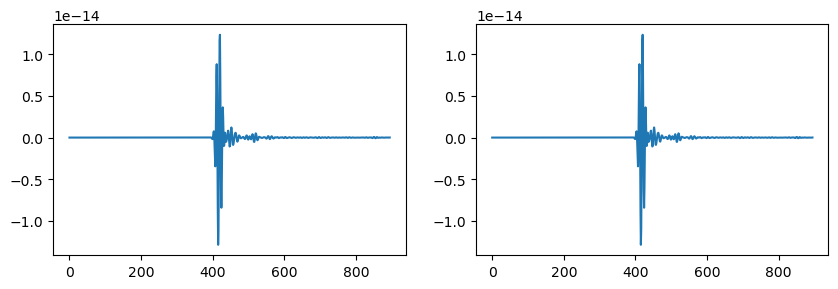

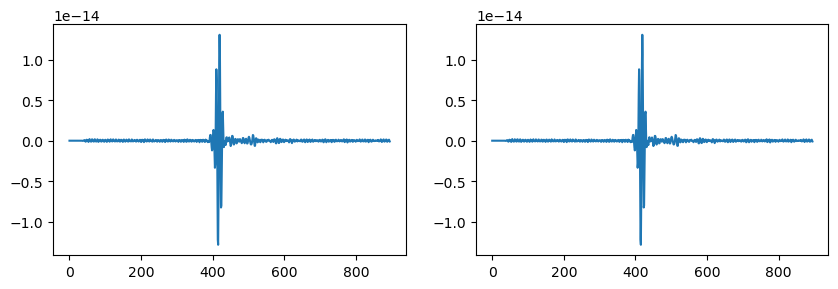

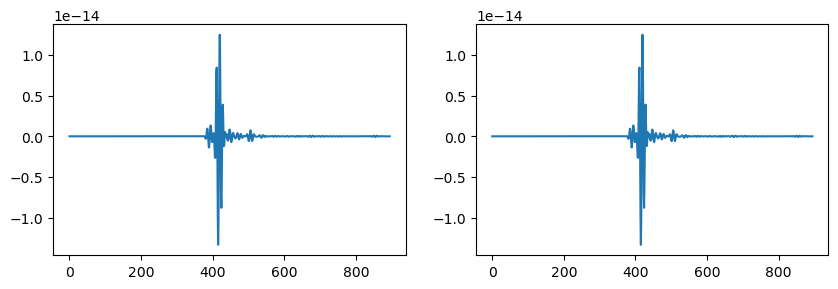

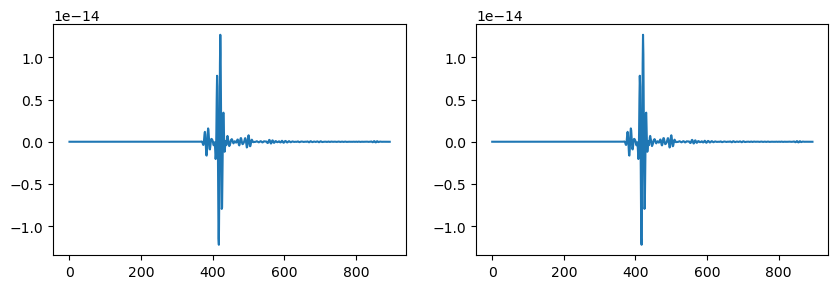

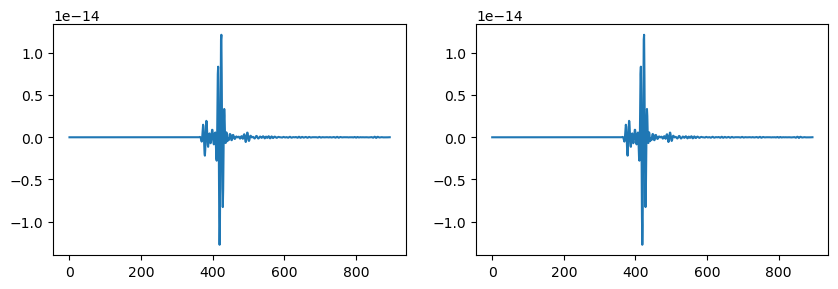

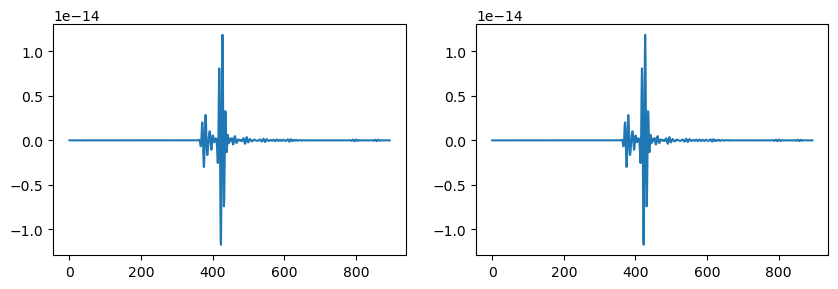

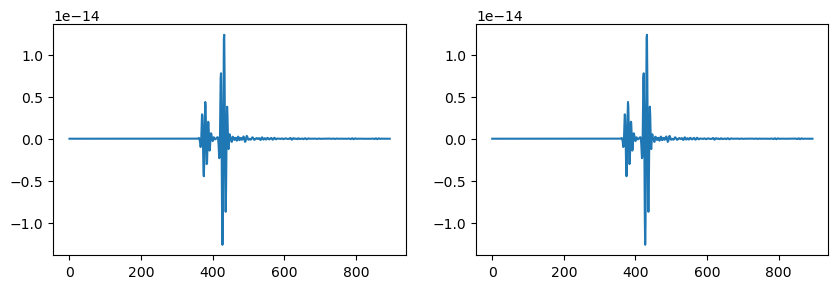

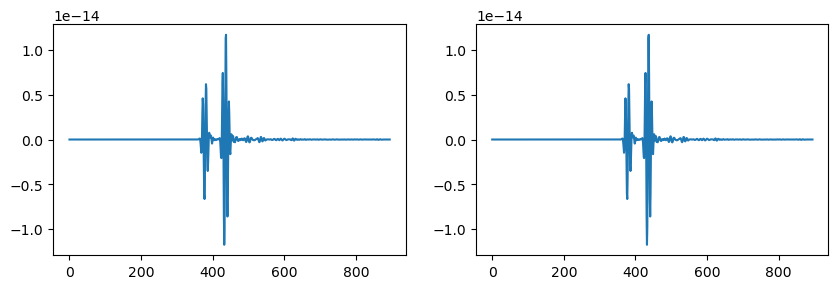

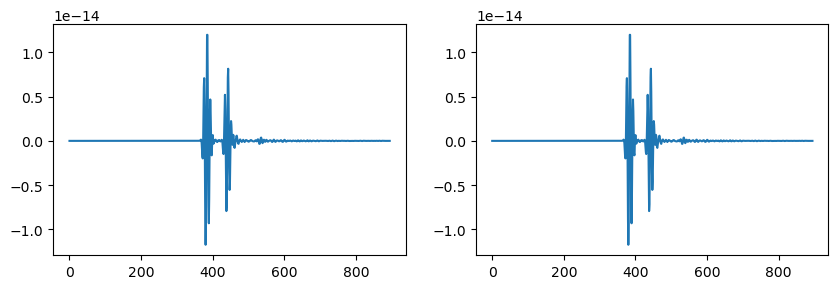

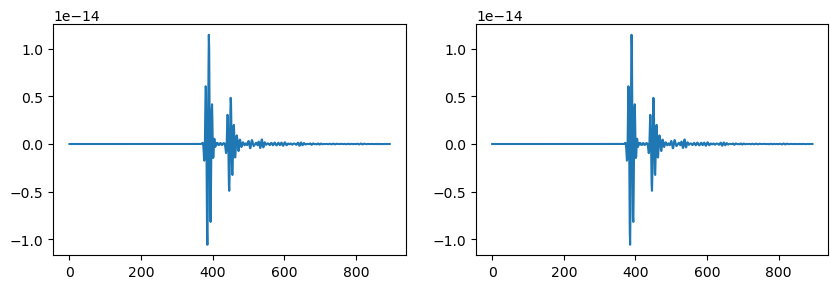

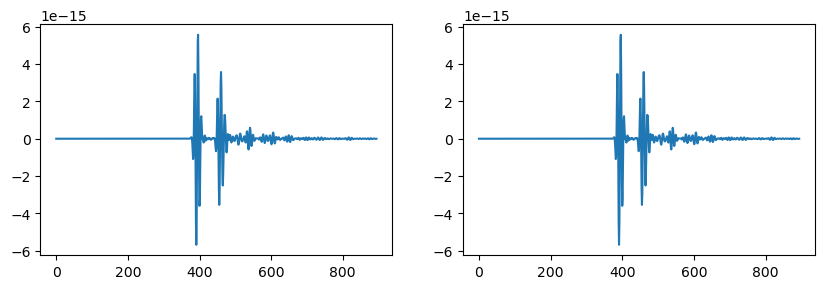

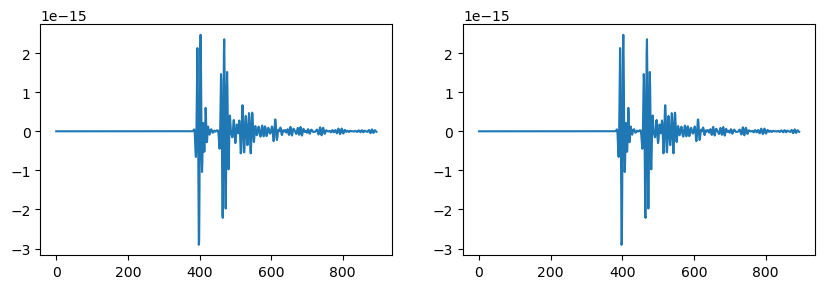

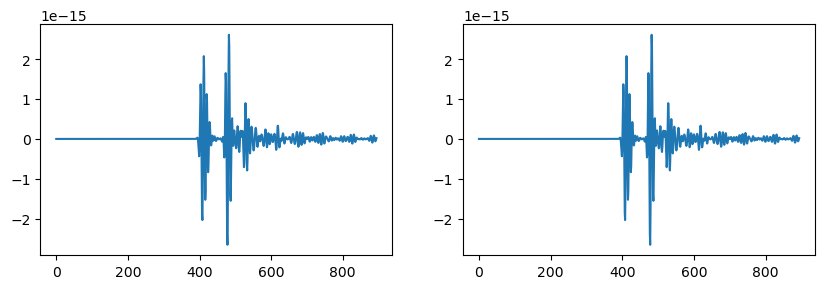

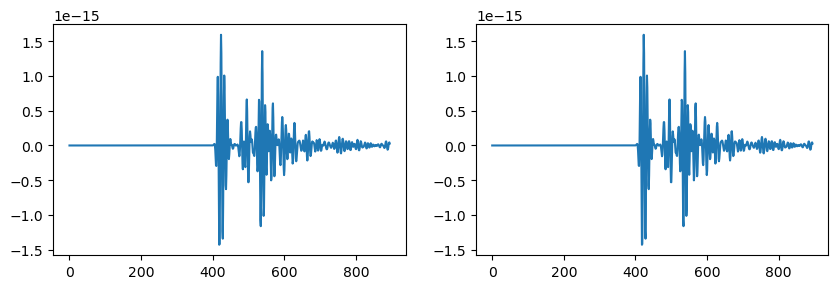

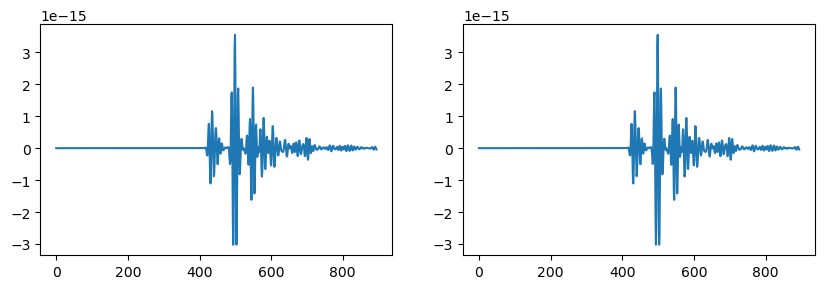

In [90]:
for i in range(0,16):    
    f = plt.figure(figsize=(10,3))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.plot(fmc_sample[:,2,i])
    ax2.plot(fmc_sample[:,i,2])
    plt.show()

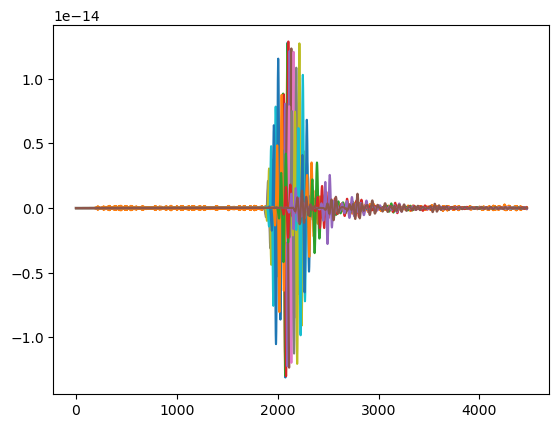

In [42]:
for i in range(0,16):
    plt.plot(fmc[:,i,1])

In [96]:
fm = open('FMC.csv')
fmc = pd.read_csv(fm.name)
fmc

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.246,0.247,0.248,0.249,0.250,0.251,0.252,0.253,0.254,0.255
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4466,7.430009e-18,-2.447034e-18,-1.537362e-18,-4.040546e-19,1.120194e-19,-1.064204e-17,-2.091605e-18,3.384951e-18,-8.940167e-18,-5.794033e-19,...,-4.727469e-18,-1.157834e-17,1.210401e-17,-4.236534e-18,-3.779698e-17,-1.353613e-18,-3.973842e-17,-3.166219e-17,-9.211756e-17,-4.534447e-18
4467,6.411497e-17,-2.805972e-18,-5.890647e-19,-7.244319e-20,-9.792261e-19,-1.111235e-17,-3.854004e-19,3.074854e-18,-9.050863e-18,-6.561375e-20,...,-6.583928e-18,-1.245484e-17,1.202710e-17,-2.051801e-18,-3.476270e-17,-8.284337e-18,-3.709291e-17,-3.289635e-17,-1.161656e-16,6.751310e-17
4468,2.603082e-17,-3.554321e-18,-7.946837e-20,2.451697e-20,-2.020025e-18,-1.194042e-17,1.202998e-18,2.429144e-18,-9.597575e-18,1.041786e-18,...,-7.528247e-18,-1.338333e-17,1.125184e-17,4.602135e-19,-3.156413e-17,-1.469156e-17,-3.413211e-17,-3.266095e-17,-1.358498e-16,4.653533e-17
4469,-6.596313e-17,-4.320518e-18,2.093988e-19,4.217489e-19,-2.957821e-18,-1.276053e-17,2.147531e-18,1.670319e-18,-1.017975e-17,2.576853e-18,...,-8.281378e-18,-1.432902e-17,1.022691e-17,2.757563e-18,-2.781489e-17,-2.058558e-17,-3.064900e-17,-3.046406e-17,-1.509433e-16,-6.547336e-17


In [102]:
npxf, npyf = fmc.shape[:2]
n = 2000
X = np.zeros((n,npxf,npyf,1))
FMCs = np.zeros((npxf,npyf))

#add FMC to FMCs
FMCs[:,:] = fmc
#convert to input
#X[i,:,:] = np.expand_dims(FMCs.T.reshape((npxf*npyf)),1)
X[i,:,:,:] = np.expand_dims(FMCs,2)
X.shape

(2000, 4471, 256, 1)

## Image processing using opencv
https://github.com/MC-Kangan/opencv-course

In [14]:
import cv2 as cv
def rescaleFrame(frame, scale=0.75):
    # Images, Videos and Live Video
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)

    dimensions = (width,height)

    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)